In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mahmoudreda55/satellite-image-classification")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'satellite-image-classification' dataset.
Path to dataset files: /kaggle/input/satellite-image-classification


In [2]:
ls /kaggle/input/satellite-image-classification

data/


In [3]:
mv "/kaggle/input/satellite-image-classification/data" /content

Streaming output truncated to the last 5000 lines.
mv: cannot remove '/kaggle/input/satellite-image-classification/data/cloudy/train_1933.jpg': Read-only file system
mv: cannot remove '/kaggle/input/satellite-image-classification/data/cloudy/train_18444.jpg': Read-only file system
mv: cannot remove '/kaggle/input/satellite-image-classification/data/cloudy/train_13124.jpg': Read-only file system
mv: cannot remove '/kaggle/input/satellite-image-classification/data/cloudy/train_19694.jpg': Read-only file system
mv: cannot remove '/kaggle/input/satellite-image-classification/data/cloudy/train_28923.jpg': Read-only file system
mv: cannot remove '/kaggle/input/satellite-image-classification/data/cloudy/train_453.jpg': Read-only file system
mv: cannot remove '/kaggle/input/satellite-image-classification/data/cloudy/train_22773.jpg': Read-only file system
mv: cannot remove '/kaggle/input/satellite-image-classification/data/cloudy/train_38400.jpg': Read-only file system
mv: cannot remove '/kagg

In [5]:
cd /content/data

/content/data


In [6]:
pwd

'/content/data'

**1. Import Libraries**

In [7]:
import tensorflow as tf
import os

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**2. Remove Dodgy Images**

In [9]:
import cv2
import imghdr

/tmp/ipython-input-4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [14]:
cd ..

/content


In [15]:
data_dir = "data"

In [16]:
import os
os.getcwd()


'/content'

In [17]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [18]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            os.remove(image_path)

**3. Load Images**

In [20]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 5631 files belonging to 4 classes.


In [21]:
data_iterator = data.as_numpy_iterator()

In [22]:
batch = data_iterator.next()

In [23]:
len(batch)

2

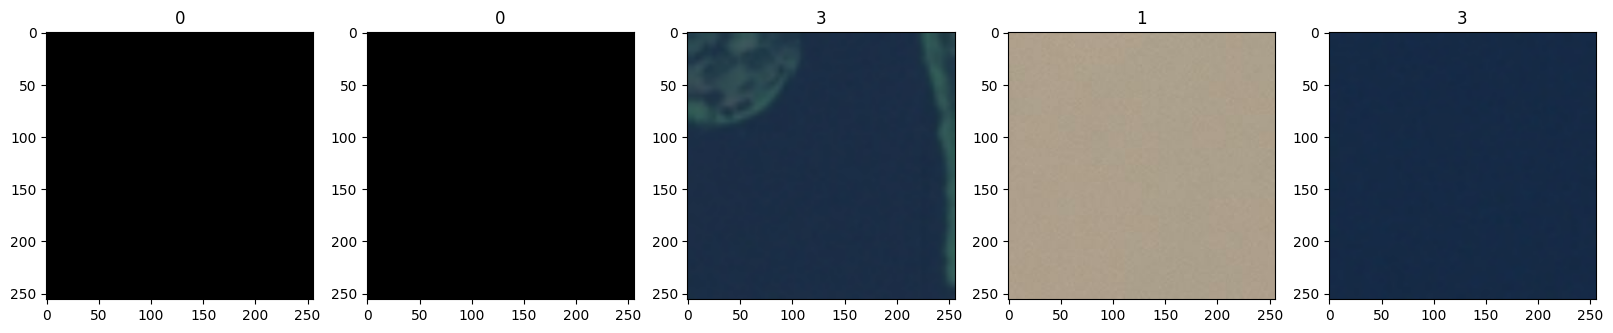

In [24]:
fig, ax = plt.subplots(ncols=5, figsize=(20,20))
for idx, img in enumerate(batch[0][:5]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [25]:
print(data.class_names) # To know How the classes are labelled

['cloudy', 'desert', 'green_area', 'water']


**4. Scale Data**

In [26]:
data = data.map(lambda x,y: (x/255, y))

In [27]:
data.as_numpy_iterator().next()

(array([[[[0.6627451 , 0.6313726 , 0.5568628 ],
          [0.6666667 , 0.63529414, 0.56078434],
          [0.6666667 , 0.63529414, 0.56078434],
          ...,
          [0.6627451 , 0.6313726 , 0.54901963],
          [0.65882355, 0.627451  , 0.54509807],
          [0.65882355, 0.627451  , 0.54509807]],
 
         [[0.6627451 , 0.6313726 , 0.5568628 ],
          [0.6666667 , 0.63529414, 0.56078434],
          [0.6666667 , 0.63529414, 0.56078434],
          ...,
          [0.6627451 , 0.6313726 , 0.54901963],
          [0.6627451 , 0.6313726 , 0.54901963],
          [0.65882355, 0.627451  , 0.54509807]],
 
         [[0.6627451 , 0.6313726 , 0.5568628 ],
          [0.6666667 , 0.63529414, 0.56078434],
          [0.6666667 , 0.63529414, 0.56078434],
          ...,
          [0.6627451 , 0.6313726 , 0.54901963],
          [0.6627451 , 0.6313726 , 0.54901963],
          [0.6627451 , 0.6313726 , 0.54901963]],
 
         ...,
 
         [[0.67058825, 0.6392157 , 0.5568628 ],
          [0.67058

**5. Split Data**

In [28]:
train_size = int(len(data)*.7) #70% train
val_size = int(len(data)*.2) #20% validation
test_size = int(len(data)*.1)#10% test

In [29]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

**6. Build Deep Learning Model**

In [30]:
from tensorflow.keras.models import Sequential #singl input and singl output
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras import regularizers

In [31]:
model = Sequential()

In [32]:
model.add(Conv2D(16,(3,3), strides=1,activation='relu',input_shape = (256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32,(3,3),strides=1,activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(256,activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(4, activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
model.compile('adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [34]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 123008)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 123008)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    31,490,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,496,420 (120.15 MB)

 Trainable params: 31,496,420 (120.15 MB)

 Non-trainable params: 0 (0.00 B)

**7. Train**

In [35]:
logdir = 'logs'

In [36]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [37]:
hist = model.fit(train,epochs=20,validation_data=val,callbacks=tensorboard_callback)

Epoch 1/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 18s 78ms/step - accuracy: 0.7092 - loss: 2.7775 - val_accuracy: 0.8652 - val_loss: 0.5461
Epoch 2/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 8s 64ms/step - accuracy: 0.8796 - loss: 0.4885 - val_accuracy: 0.9196 - val_loss: 0.3250
Epoch 3/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 13s 85ms/step - accuracy: 0.9205 - loss: 0.3032 - val_accuracy: 0.8759 - val_loss: 0.4398
Epoch 4/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 8s 67ms/step - accuracy: 0.9085 - loss: 0.3251 - val_accuracy: 0.9339 - val_loss: 0.2102
Epoch 5/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 10s 77ms/step - accuracy: 0.9285 - loss: 0.2163 - val_accuracy: 0.9196 - val_loss: 0.2206
Epoch 6/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 10s 77ms/step - accuracy: 0.9326 - loss: 0.2032 - val_accuracy: 0.9152 - val_loss: 0.2817
Epoch 7/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 9s 64ms/step - accuracy: 0.9296 - loss: 0.2329 - val_accuracy: 0.8857 - val_loss: 0.2949
Epoch 8/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 8s 66ms/step - accuracy: 0.9108 - loss: 0.2548 - val_

**8. Evaluation**

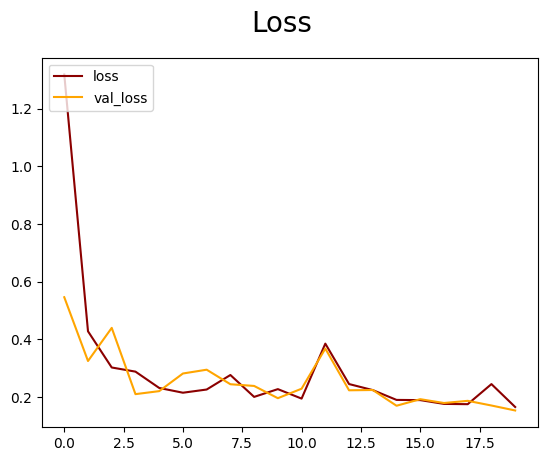

In [38]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='darkred', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

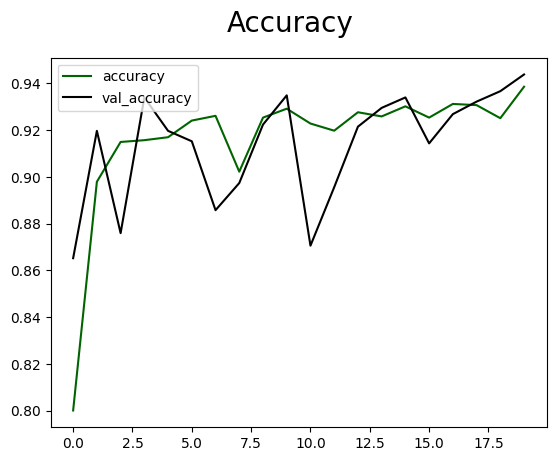

In [39]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='darkgreen', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='k', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [40]:
from tensorflow.keras.metrics import Precision, Recall

**9. Test**

In [41]:
import cv2

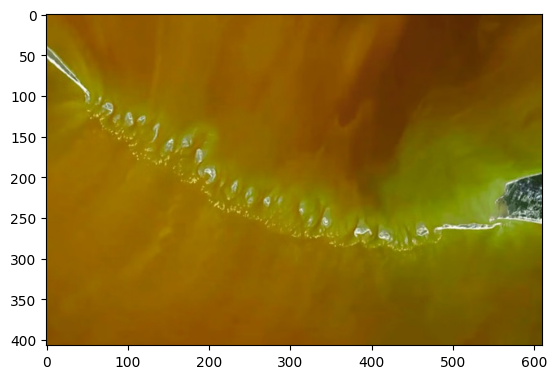

In [54]:
img = cv2.imread('/content/ram_setu_rsz-2.avif')
plt.imshow(img)
plt.show()

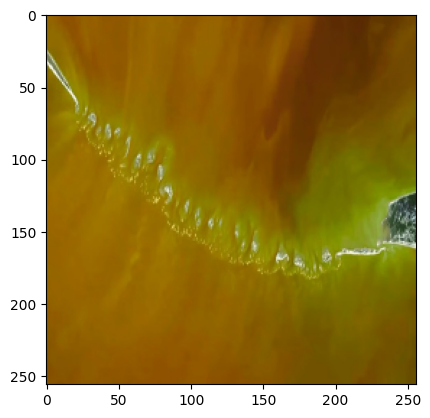

In [55]:
img = cv2.resize(img,(256,256))
plt.imshow(img)
plt.show()

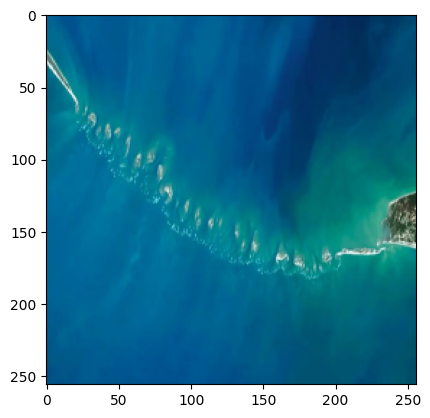

In [56]:
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()


In [57]:
yhat = model.predict(np.expand_dims(img/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


In [58]:
yhat

array([[4.4963622e-16, 1.1538231e-09, 6.2727166e-09, 1.0000000e+00]],
      dtype=float32)

In [59]:
Classes = ['cloudy', 'desert', 'green_area', 'water']

In [60]:
a = np.argmax(yhat)

In [61]:
Classes[a]

'water'

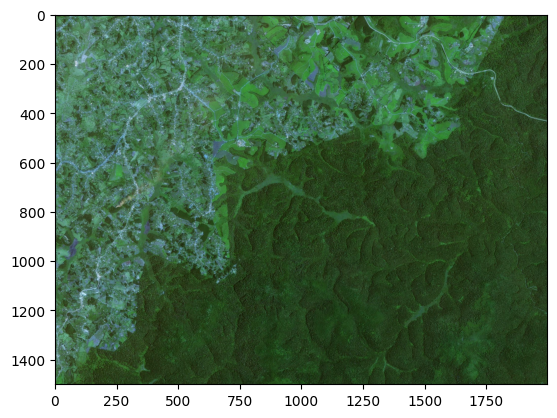

In [62]:
img = cv2.imread('/content/kibale-national-park-western_uganda_20230723_2432-2427_rgb_flat_6m_2550px_rotated_geo.jpg')
plt.imshow(img)
plt.show()

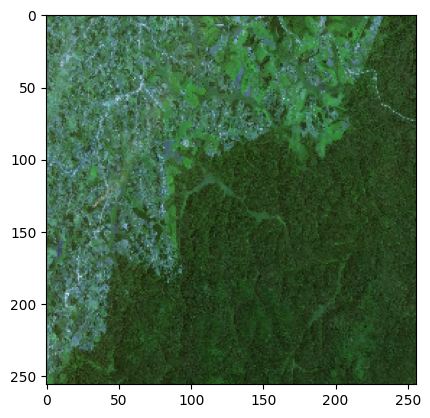

In [63]:
img = cv2.resize(img,(256,256))
plt.imshow(img)
plt.show()

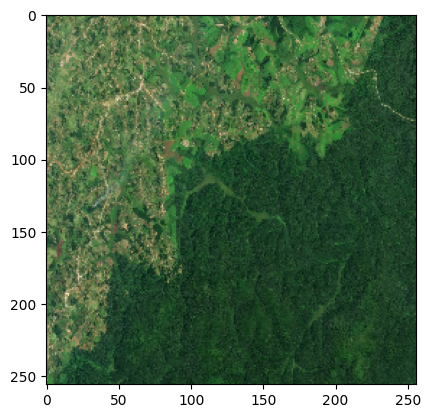

In [64]:
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()


In [65]:
yhat = model.predict(np.expand_dims(img/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


In [66]:
yhat

array([[7.6908924e-05, 2.1980901e-05, 9.9889660e-01, 1.0044250e-03]],
      dtype=float32)

In [67]:
b = np.argmax(yhat)

In [68]:
Classes[b]

'green_area'

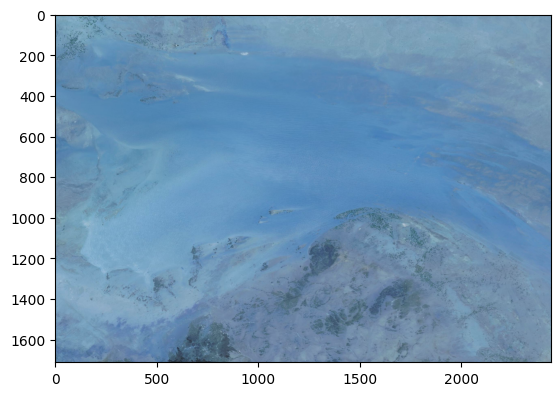

In [77]:
img = cv2.imread('/content/Al-Nafud_Desert_(MODIS).jpg')
plt.imshow(img)
plt.show()

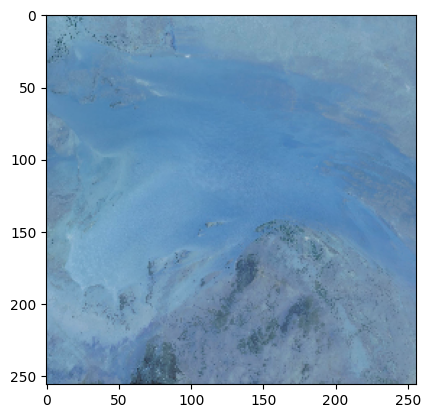

In [78]:
img = cv2.resize(img,(256,256))
plt.imshow(img)
plt.show()

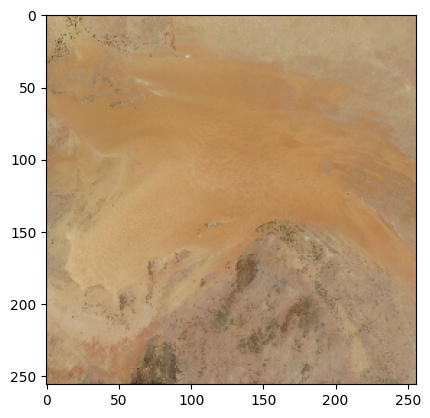

In [79]:
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [80]:
yhat = model.predict(np.expand_dims(img/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


In [81]:
yhat

array([[2.1146260e-09, 9.9999833e-01, 3.3398391e-09, 1.6350394e-06]],
      dtype=float32)

In [82]:
c = np.argmax(yhat)

In [83]:
Classes[c]

'desert'

**10. Save The Model**

In [92]:
model.save(os.path.join('models_1','image_classifier_models.h5'))